In [1]:
import pandas as pd
import os

# List all files in the current directory
files = [file for file in os.listdir() if file.startswith('fold_') and file.endswith('_train.csv')]

# Load and print each CSV file separately
for file in files:
    df = pd.read_csv(file)
    print(f"File: {file}")
    print(df.head())  # Print first few rows of each DataFrame
    print("\n")  # Print an empty line for separation


File: fold_1_train.csv
                                          image_path  class_label
0  D:\archive (1)\PlantVillage\Pepper__bell___Bac...            0
1  D:\archive (1)\PlantVillage\Pepper__bell___Bac...            0
2  D:\archive (1)\PlantVillage\Pepper__bell___Bac...            0
3  D:\archive (1)\PlantVillage\Pepper__bell___Bac...            0
4  D:\archive (1)\PlantVillage\Pepper__bell___Bac...            0


File: fold_2_train.csv
                                          image_path  class_label
0  D:\archive (1)\PlantVillage\Pepper__bell___Bac...            0
1  D:\archive (1)\PlantVillage\Pepper__bell___Bac...            0
2  D:\archive (1)\PlantVillage\Pepper__bell___Bac...            0
3  D:\archive (1)\PlantVillage\Pepper__bell___Bac...            0
4  D:\archive (1)\PlantVillage\Pepper__bell___Bac...            0


File: fold_3_train.csv
                                          image_path  class_label
0  D:\archive (1)\PlantVillage\Pepper__bell___Bac...            0
1  

In [1]:
##import torch
##import torch.nn as nn
##import torch.optim as optim
##import torchvision
##from torchvision import transforms
##from torch.utils.data import DataLoader
##from tqdm import tqdm
##import matplotlib.pyplot as plt
##
### Check if GPU is available
##device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
##
### Define data transforms
##transform = transforms.Compose([
##    transforms.Resize((64, 64)),  # Resize to 64x64
##    transforms.ToTensor(),
##    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
##])
##
### Define the directory path
##data_dir = r"D:\archive (1)\PlantVillage"
##
### Load the entire dataset
##full_dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)
##
### Define the sizes of each split
##train_size = int(0.8 * len(full_dataset))
##val_size = int(0.1 * len(full_dataset))
##test_size = len(full_dataset) - train_size - val_size
##
### Split the dataset into training, validation, and testing sets
##train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size, test_size])
##
### Create data loaders for each set
##batch_size = 128
##train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
##val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
##test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
##
### Print class names
##print(full_dataset.classes)
##
### AlexNet model definition for 64x64 images
##class AlexNet(nn.Module):
##    def __init__(self, num_classes=15):
##        super(AlexNet, self).__init__()
##        self.features = nn.Sequential(
##            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
##            nn.ReLU(inplace=True),
##            nn.MaxPool2d(kernel_size=2, stride=2),
##            nn.Conv2d(64, 192, kernel_size=3, padding=1),
##            nn.ReLU(inplace=True),
##            nn.MaxPool2d(kernel_size=2, stride=2),
##            nn.Conv2d(192, 384, kernel_size=3, padding=1),
##            nn.ReLU(inplace=True),
##            nn.Conv2d(384, 256, kernel_size=3, padding=1),
##            nn.ReLU(inplace=True),
##            nn.Conv2d(256, 256, kernel_size=3, padding=1),
##            nn.ReLU(inplace=True),
##            nn.MaxPool2d(kernel_size=2, stride=2),
##        )
##        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
##        self.classifier = nn.Sequential(
##            nn.Dropout(),
##            nn.Linear(256 * 6 * 6, 4096),
##            nn.ReLU(inplace=True),
##            nn.Dropout(),
##            nn.Linear(4096, 4096),
##            nn.ReLU(inplace=True),
##            nn.Linear(4096, num_classes),
##        )
##
##    def forward(self, x):
##        x = self.features(x)
##        x = self.avgpool(x)
##        x = torch.flatten(x, 1)
##        x = self.classifier(x)
##        return x
##
##
##model = AlexNet(num_classes=15).to(device)
##print(model)
##

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
 

In [ ]:
##
##
### Function to evaluate the model
##def evaluate_model(model, data_loader, criterion, device):
##    model.eval()
##    loss = 0.0
##    correct = 0
##    total = 0
##    with torch.no_grad():
##        for images, labels in data_loader:
##            images, labels = images.to(device), labels.to(device)
##            outputs = model(images)
##            loss += criterion(outputs, labels).item()
##            _, predicted = torch.max(outputs.data, 1)
##            total += labels.size(0)
##            correct += (predicted == labels).sum().item()
##    
##    avg_loss = loss / len(data_loader)
##    accuracy = correct / total
##    return avg_loss, accuracy
##
### Function to train the model
##def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
##    train_losses = []
##    val_losses = []
##    train_accuracies = []
##    val_accuracies = []
##    
##    for epoch in range(num_epochs):
##        model.train()
##        running_loss = 0.0
##        correct_train = 0
##        total_train = 0
##        
##        for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False):
##            images, labels = images.to(device), labels.to(device)
##            
##            optimizer.zero_grad()
##            outputs = model(images)
##            loss = criterion(outputs, labels)
##            loss.backward()
##            optimizer.step()
##            
##            running_loss += loss.item()
##            _, predicted = torch.max(outputs.data, 1)
##            total_train += labels.size(0)
##            correct_train += (predicted == labels).sum().item()
##        
##        avg_train_loss = running_loss / len(train_loader)
##        train_accuracy = correct_train / total_train
##        
##        val_loss, val_accuracy = evaluate_model(model, val_loader, criterion, device)
##        
##        train_losses.append(avg_train_loss)
##        val_losses.append(val_loss)
##        train_accuracies.append(train_accuracy)
##        val_accuracies.append(val_accuracy)
##        
##        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')
##    
##    return train_losses, val_losses, train_accuracies, val_accuracies
##
### Set hyperparameters
##num_epochs = 50
##learning_rates = [1e-3, 1e-4, 1e-5]
##
### Initialize results dictionary
##results = {}
##
### Loop through each learning rate
##for lr in learning_rates:
##    print(f'\nTraining with learning rate: {lr}')
##    
##    # Initialize model, criterion, and optimizer
##    model = AlexNet(num_classes=15).to(device)
##    criterion = nn.CrossEntropyLoss()
##    optimizer = optim.Adam(model.parameters(), lr=lr)
##    
##    # Train the model
##    train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device)
##    
##    # Evaluate on test set
##    test_loss, test_accuracy = evaluate_model(model, test_loader, criterion, device)
##    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')
##    
##    # Store results
##    results[lr] = {
##        'train_losses': train_losses,
##        'val_losses': val_losses,
##        'train_accuracies': train_accuracies,
##        'val_accuracies': val_accuracies,
##        'test_loss': test_loss,
##        'test_accuracy': test_accuracy
##    }
##
### Plot the results
##plt.figure(figsize=(12, 5))
##
##for lr, result in results.items():
##    plt.subplot(1, 2, 1)
##    plt.plot(result['train_losses'], label=f'Train Loss LR={lr}')
##    plt.plot(result['val_losses'], label=f'Val Loss LR={lr}')
##    plt.xlabel('Epoch')
##    plt.ylabel('Loss')
##    plt.legend()
##    
##    plt.subplot(1, 2, 2)
##    plt.plot(result['train_accuracies'], label=f'Train Acc LR={lr}')
##    plt.plot(result['val_accuracies'], label=f'Val Acc LR={lr}')
##    plt.xlabel('Epoch')
##    plt.ylabel('Accuracy')
##    plt.legend()
##
##plt.tight_layout()
##plt.show()
##
##
##

In [ ]:
##import torch
##import torch.nn as nn
##import torch.optim as optim
##import torchvision
##from torchvision import transforms
##from torch.utils.data import DataLoader
##from tqdm import tqdm
##import matplotlib.pyplot as plt
##
### Check if GPU is available
##device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
##
### Define data transforms
##transform = transforms.Compose([
##    transforms.Resize((64, 64)),  # Resize to 64x64
##    transforms.ToTensor(),
##    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
##])
##
### Define the directory path
##data_dir = r"D:\archive (1)\PlantVillage"
##
### Load the entire dataset
##full_dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)
##
### Define the sizes of each split
##train_size = int(0.8 * len(full_dataset))
##val_size = int(0.1 * len(full_dataset))
##test_size = len(full_dataset) - train_size - val_size
##
### Split the dataset into training, validation, and testing sets
##train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size, test_size])
##
### Create data loaders for each set
##batch_size = 128
##train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
##val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
##test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
##
### Print class names
##print(full_dataset.classes)
##
### AlexNet model definition for 64x64 images
##class AlexNet(nn.Module):
##    def __init__(self, num_classes=15):
##        super(AlexNet, self).__init__()
##        self.features = nn.Sequential(
##            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
##            nn.ReLU(inplace=True),
##            nn.MaxPool2d(kernel_size=2, stride=2),
##            nn.Conv2d(64, 192, kernel_size=3, padding=1),
##            nn.ReLU(inplace=True),
##            nn.MaxPool2d(kernel_size=2, stride=2),
##            nn.Conv2d(192, 384, kernel_size=3, padding=1),
##            nn.ReLU(inplace=True),
##            nn.Conv2d(384, 256, kernel_size=3, padding=1),
##            nn.ReLU(inplace=True),
##            nn.Conv2d(256, 256, kernel_size=3, padding=1),
##            nn.ReLU(inplace=True),
##            nn.MaxPool2d(kernel_size=2, stride=2),
##        )
##        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
##        self.classifier = nn.Sequential(
##            nn.Dropout(),
##            nn.Linear(256 * 6 * 6, 4096),
##            nn.ReLU(inplace=True),
##            nn.Dropout(),
##            nn.Linear(4096, 4096),
##            nn.ReLU(inplace=True),
##            nn.Linear(4096, num_classes),
##        )
##
##    def forward(self, x):
##        x = self.features(x)
##        x = self.avgpool(x)
##        x = torch.flatten(x, 1)
##        x = self.classifier(x)
##        return x
##
##
##model = AlexNet(num_classes=15).to(device)
##print(model)
##

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
 

In [ ]:
##
##
### Function to evaluate the model
##def evaluate_model(model, data_loader, criterion, device):
##    model.eval()
##    loss = 0.0
##    correct = 0
##    total = 0
##    with torch.no_grad():
##        for images, labels in data_loader:
##            images, labels = images.to(device), labels.to(device)
##            outputs = model(images)
##            loss += criterion(outputs, labels).item()
##            _, predicted = torch.max(outputs.data, 1)
##            total += labels.size(0)
##            correct += (predicted == labels).sum().item()
##    
##    avg_loss = loss / len(data_loader)
##    accuracy = correct / total
##    return avg_loss, accuracy
##
### Function to train the model
##def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
##    train_losses = []
##    val_losses = []
##    train_accuracies = []
##    val_accuracies = []
##    
##    for epoch in range(num_epochs):
##        model.train()
##        running_loss = 0.0
##        correct_train = 0
##        total_train = 0
##        
##        for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False):
##            images, labels = images.to(device), labels.to(device)
##            
##            optimizer.zero_grad()
##            outputs = model(images)
##            loss = criterion(outputs, labels)
##            loss.backward()
##            optimizer.step()
##            
##            running_loss += loss.item()
##            _, predicted = torch.max(outputs.data, 1)
##            total_train += labels.size(0)
##            correct_train += (predicted == labels).sum().item()
##        
##        avg_train_loss = running_loss / len(train_loader)
##        train_accuracy = correct_train / total_train
##        
##        val_loss, val_accuracy = evaluate_model(model, val_loader, criterion, device)
##        
##        train_losses.append(avg_train_loss)
##        val_losses.append(val_loss)
##        train_accuracies.append(train_accuracy)
##        val_accuracies.append(val_accuracy)
##        
##        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')
##    
##    return train_losses, val_losses, train_accuracies, val_accuracies
##
### Set hyperparameters
##num_epochs = 50
##learning_rates = [1e-3, 1e-4, 1e-5]
##
### Initialize results dictionary
##results = {}
##
### Loop through each learning rate
##for lr in learning_rates:
##    print(f'\nTraining with learning rate: {lr}')
##    
##    # Initialize model, criterion, and optimizer
##    model = AlexNet(num_classes=15).to(device)
##    criterion = nn.CrossEntropyLoss()
##    optimizer = optim.Adam(model.parameters(), lr=lr)
##    
##    # Train the model
##    train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device)
##    
##    # Evaluate on test set
##    test_loss, test_accuracy = evaluate_model(model, test_loader, criterion, device)
##    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')
##    
##    # Store results
##    results[lr] = {
##        'train_losses': train_losses,
##        'val_losses': val_losses,
##        'train_accuracies': train_accuracies,
##        'val_accuracies': val_accuracies,
##        'test_loss': test_loss,
##        'test_accuracy': test_accuracy
##    }
##
### Plot the results
##plt.figure(figsize=(12, 5))
##
##for lr, result in results.items():
##    plt.subplot(1, 2, 1)
##    plt.plot(result['train_losses'], label=f'Train Loss LR={lr}')
##    plt.plot(result['val_losses'], label=f'Val Loss LR={lr}')
##    plt.xlabel('Epoch')
##    plt.ylabel('Loss')
##    plt.legend()
##    
##    plt.subplot(1, 2, 2)
##    plt.plot(result['train_accuracies'], label=f'Train Acc LR={lr}')
##    plt.plot(result['val_accuracies'], label=f'Val Acc LR={lr}')
##    plt.xlabel('Epoch')
##    plt.ylabel('Accuracy')
##    plt.legend()
##
##plt.tight_layout()
##plt.show()
##
##
##

Class Names: [12  6 11  5 10  0 14  7  2  9  8 13  1  3  4]


Epoch 1/50: 100%|██████████| 52/52 [00:01<00:00, 32.37it/s, Loss=2.65, Accuracy=0.133]


Epoch [1/50], Train Loss: 2.6338, Train Accuracy: 0.1329, Val Loss: 2.2943, Val Accuracy: 0.2217


Epoch 2/50: 100%|██████████| 52/52 [00:01<00:00, 34.88it/s, Loss=2.04, Accuracy=0.291]


Epoch [2/50], Train Loss: 2.0255, Train Accuracy: 0.2907, Val Loss: 1.8402, Val Accuracy: 0.3895


Epoch 3/50: 100%|██████████| 52/52 [00:01<00:00, 35.54it/s, Loss=1.64, Accuracy=0.429]


Epoch [3/50], Train Loss: 1.6299, Train Accuracy: 0.4285, Val Loss: 1.4065, Val Accuracy: 0.5015


Epoch 4/50: 100%|██████████| 52/52 [00:01<00:00, 35.29it/s, Loss=1.28, Accuracy=0.562]


Epoch [4/50], Train Loss: 1.2681, Train Accuracy: 0.5616, Val Loss: 1.1424, Val Accuracy: 0.6111


Epoch 5/50: 100%|██████████| 52/52 [00:01<00:00, 34.61it/s, Loss=0.974, Accuracy=0.678]


Epoch [5/50], Train Loss: 0.9659, Train Accuracy: 0.6777, Val Loss: 0.9390, Val Accuracy: 0.6832


Epoch 6/50: 100%|██████████| 52/52 [00:01<00:00, 34.70it/s, Loss=0.797, Accuracy=0.739]


Epoch [6/50], Train Loss: 0.7911, Train Accuracy: 0.7390, Val Loss: 0.8497, Val Accuracy: 0.7093


Epoch 7/50: 100%|██████████| 52/52 [00:01<00:00, 34.18it/s, Loss=0.688, Accuracy=0.775]


Epoch [7/50], Train Loss: 0.6823, Train Accuracy: 0.7753, Val Loss: 0.7790, Val Accuracy: 0.7589


Epoch 8/50: 100%|██████████| 52/52 [00:01<00:00, 35.32it/s, Loss=0.587, Accuracy=0.808]


Epoch [8/50], Train Loss: 0.5824, Train Accuracy: 0.8078, Val Loss: 0.5714, Val Accuracy: 0.8098


Epoch 9/50: 100%|██████████| 52/52 [00:01<00:00, 34.99it/s, Loss=0.491, Accuracy=0.843]


Epoch [9/50], Train Loss: 0.4872, Train Accuracy: 0.8427, Val Loss: 0.5343, Val Accuracy: 0.8292


Epoch 10/50: 100%|██████████| 52/52 [00:01<00:00, 33.92it/s, Loss=0.464, Accuracy=0.852]


Epoch [10/50], Train Loss: 0.4608, Train Accuracy: 0.8516, Val Loss: 0.5292, Val Accuracy: 0.8286


Epoch 11/50: 100%|██████████| 52/52 [00:01<00:00, 33.81it/s, Loss=0.399, Accuracy=0.869]


Epoch [11/50], Train Loss: 0.3962, Train Accuracy: 0.8689, Val Loss: 0.4602, Val Accuracy: 0.8516


Epoch 12/50: 100%|██████████| 52/52 [00:01<00:00, 36.14it/s, Loss=0.33, Accuracy=0.892] 


Epoch [12/50], Train Loss: 0.3271, Train Accuracy: 0.8925, Val Loss: 0.4833, Val Accuracy: 0.8540


Epoch 13/50: 100%|██████████| 52/52 [00:01<00:00, 36.39it/s, Loss=0.312, Accuracy=0.901]


Epoch [13/50], Train Loss: 0.3096, Train Accuracy: 0.9009, Val Loss: 0.4655, Val Accuracy: 0.8504


Epoch 14/50: 100%|██████████| 52/52 [00:01<00:00, 34.15it/s, Loss=0.323, Accuracy=0.897]


Epoch [14/50], Train Loss: 0.3203, Train Accuracy: 0.8969, Val Loss: 0.3886, Val Accuracy: 0.8789


Epoch 15/50: 100%|██████████| 52/52 [00:01<00:00, 34.69it/s, Loss=0.233, Accuracy=0.925]


Epoch [15/50], Train Loss: 0.2314, Train Accuracy: 0.9248, Val Loss: 0.3938, Val Accuracy: 0.8752


Epoch 16/50: 100%|██████████| 52/52 [00:01<00:00, 33.86it/s, Loss=0.231, Accuracy=0.925]


Epoch [16/50], Train Loss: 0.2295, Train Accuracy: 0.9246, Val Loss: 0.4368, Val Accuracy: 0.8746


Epoch 17/50: 100%|██████████| 52/52 [00:01<00:00, 35.64it/s, Loss=0.229, Accuracy=0.925]


Epoch [17/50], Train Loss: 0.2272, Train Accuracy: 0.9253, Val Loss: 0.4948, Val Accuracy: 0.8698


Epoch 18/50: 100%|██████████| 52/52 [00:01<00:00, 34.87it/s, Loss=0.255, Accuracy=0.92] 


Epoch [18/50], Train Loss: 0.2531, Train Accuracy: 0.9197, Val Loss: 0.4372, Val Accuracy: 0.8637


Epoch 19/50: 100%|██████████| 52/52 [00:01<00:00, 34.57it/s, Loss=0.206, Accuracy=0.936]


Epoch [19/50], Train Loss: 0.2042, Train Accuracy: 0.9356, Val Loss: 0.4713, Val Accuracy: 0.8716


Epoch 20/50: 100%|██████████| 52/52 [00:01<00:00, 35.77it/s, Loss=0.16, Accuracy=0.949] 


Epoch [20/50], Train Loss: 0.1589, Train Accuracy: 0.9494, Val Loss: 0.3881, Val Accuracy: 0.8898


Epoch 21/50: 100%|██████████| 52/52 [00:01<00:00, 34.89it/s, Loss=0.144, Accuracy=0.954]


Epoch [21/50], Train Loss: 0.1431, Train Accuracy: 0.9541, Val Loss: 0.4279, Val Accuracy: 0.8795


Epoch 22/50: 100%|██████████| 52/52 [00:01<00:00, 34.96it/s, Loss=0.172, Accuracy=0.945]


Epoch [22/50], Train Loss: 0.1708, Train Accuracy: 0.9452, Val Loss: 0.5125, Val Accuracy: 0.8625


Epoch 23/50: 100%|██████████| 52/52 [00:01<00:00, 35.93it/s, Loss=0.136, Accuracy=0.957]


Epoch [23/50], Train Loss: 0.1349, Train Accuracy: 0.9571, Val Loss: 0.3763, Val Accuracy: 0.8916


Epoch 24/50: 100%|██████████| 52/52 [00:01<00:00, 33.77it/s, Loss=0.121, Accuracy=0.96]  


Epoch [24/50], Train Loss: 0.1198, Train Accuracy: 0.9596, Val Loss: 0.4566, Val Accuracy: 0.8752


Epoch 25/50: 100%|██████████| 52/52 [00:01<00:00, 35.16it/s, Loss=0.119, Accuracy=0.961]


Epoch [25/50], Train Loss: 0.1180, Train Accuracy: 0.9607, Val Loss: 0.4355, Val Accuracy: 0.8898


Epoch 26/50: 100%|██████████| 52/52 [00:01<00:00, 34.42it/s, Loss=0.118, Accuracy=0.964]


Epoch [26/50], Train Loss: 0.1172, Train Accuracy: 0.9645, Val Loss: 0.5433, Val Accuracy: 0.8770


Epoch 27/50: 100%|██████████| 52/52 [00:01<00:00, 34.76it/s, Loss=0.152, Accuracy=0.954]


Epoch [27/50], Train Loss: 0.1506, Train Accuracy: 0.9538, Val Loss: 0.4874, Val Accuracy: 0.8758


Epoch 28/50: 100%|██████████| 52/52 [00:01<00:00, 34.99it/s, Loss=0.134, Accuracy=0.957]


Epoch [28/50], Train Loss: 0.1325, Train Accuracy: 0.9574, Val Loss: 0.5528, Val Accuracy: 0.8686


Epoch 29/50: 100%|██████████| 52/52 [00:01<00:00, 34.29it/s, Loss=0.108, Accuracy=0.966] 


Epoch [29/50], Train Loss: 0.1071, Train Accuracy: 0.9662, Val Loss: 0.4694, Val Accuracy: 0.8783


Epoch 30/50: 100%|██████████| 52/52 [00:01<00:00, 34.76it/s, Loss=0.0746, Accuracy=0.977]


Epoch [30/50], Train Loss: 0.0740, Train Accuracy: 0.9770, Val Loss: 0.5208, Val Accuracy: 0.8837


Epoch 31/50: 100%|██████████| 52/52 [00:01<00:00, 37.11it/s, Loss=0.115, Accuracy=0.965]


Epoch [31/50], Train Loss: 0.1146, Train Accuracy: 0.9651, Val Loss: 0.4717, Val Accuracy: 0.8910


Epoch 32/50: 100%|██████████| 52/52 [00:01<00:00, 36.27it/s, Loss=0.117, Accuracy=0.964]


Epoch [32/50], Train Loss: 0.1157, Train Accuracy: 0.9637, Val Loss: 0.5651, Val Accuracy: 0.8637


Epoch 33/50: 100%|██████████| 52/52 [00:01<00:00, 36.43it/s, Loss=0.101, Accuracy=0.969] 


Epoch [33/50], Train Loss: 0.1000, Train Accuracy: 0.9686, Val Loss: 0.4531, Val Accuracy: 0.8819


Epoch 34/50: 100%|██████████| 52/52 [00:01<00:00, 35.03it/s, Loss=0.0947, Accuracy=0.971]


Epoch [34/50], Train Loss: 0.0940, Train Accuracy: 0.9707, Val Loss: 0.3930, Val Accuracy: 0.9019


Epoch 35/50: 100%|██████████| 52/52 [00:01<00:00, 35.68it/s, Loss=0.0898, Accuracy=0.973]


Epoch [35/50], Train Loss: 0.0891, Train Accuracy: 0.9725, Val Loss: 0.5615, Val Accuracy: 0.8783


Epoch 36/50: 100%|██████████| 52/52 [00:01<00:00, 36.96it/s, Loss=0.0849, Accuracy=0.974]


Epoch [36/50], Train Loss: 0.0842, Train Accuracy: 0.9743, Val Loss: 0.5682, Val Accuracy: 0.8807


Epoch 37/50: 100%|██████████| 52/52 [00:01<00:00, 36.26it/s, Loss=0.0844, Accuracy=0.975]


Epoch [37/50], Train Loss: 0.0838, Train Accuracy: 0.9752, Val Loss: 0.5992, Val Accuracy: 0.8789


Epoch 38/50: 100%|██████████| 52/52 [00:01<00:00, 37.48it/s, Loss=0.087, Accuracy=0.975] 


Epoch [38/50], Train Loss: 0.0863, Train Accuracy: 0.9749, Val Loss: 0.4697, Val Accuracy: 0.9019


Epoch 39/50: 100%|██████████| 52/52 [00:01<00:00, 35.74it/s, Loss=0.0596, Accuracy=0.982]


Epoch [39/50], Train Loss: 0.0592, Train Accuracy: 0.9821, Val Loss: 0.5346, Val Accuracy: 0.8892


Epoch 40/50: 100%|██████████| 52/52 [00:01<00:00, 36.00it/s, Loss=0.079, Accuracy=0.976] 


Epoch [40/50], Train Loss: 0.0783, Train Accuracy: 0.9765, Val Loss: 0.4831, Val Accuracy: 0.8952


Epoch 41/50: 100%|██████████| 52/52 [00:01<00:00, 36.27it/s, Loss=0.0729, Accuracy=0.978]


Epoch [41/50], Train Loss: 0.0724, Train Accuracy: 0.9780, Val Loss: 0.4278, Val Accuracy: 0.8982


Epoch 42/50: 100%|██████████| 52/52 [00:01<00:00, 35.52it/s, Loss=0.0764, Accuracy=0.975]


Epoch [42/50], Train Loss: 0.0758, Train Accuracy: 0.9750, Val Loss: 0.5402, Val Accuracy: 0.8770


Epoch 43/50: 100%|██████████| 52/52 [00:01<00:00, 34.96it/s, Loss=0.123, Accuracy=0.964] 


Epoch [43/50], Train Loss: 0.1220, Train Accuracy: 0.9639, Val Loss: 0.4392, Val Accuracy: 0.8789


Epoch 44/50: 100%|██████████| 52/52 [00:01<00:00, 34.33it/s, Loss=0.108, Accuracy=0.968] 


Epoch [44/50], Train Loss: 0.1073, Train Accuracy: 0.9675, Val Loss: 0.5662, Val Accuracy: 0.8789


Epoch 45/50: 100%|██████████| 52/52 [00:01<00:00, 35.44it/s, Loss=0.085, Accuracy=0.974] 


Epoch [45/50], Train Loss: 0.0843, Train Accuracy: 0.9741, Val Loss: 0.5325, Val Accuracy: 0.8904


Epoch 46/50: 100%|██████████| 52/52 [00:01<00:00, 33.28it/s, Loss=0.0759, Accuracy=0.977]


Epoch [46/50], Train Loss: 0.0753, Train Accuracy: 0.9771, Val Loss: 0.5166, Val Accuracy: 0.8928


Epoch 47/50: 100%|██████████| 52/52 [00:01<00:00, 32.42it/s, Loss=0.067, Accuracy=0.98]  


Epoch [47/50], Train Loss: 0.0665, Train Accuracy: 0.9803, Val Loss: 0.4736, Val Accuracy: 0.8940


Epoch 48/50: 100%|██████████| 52/52 [00:01<00:00, 33.43it/s, Loss=0.0601, Accuracy=0.983]


Epoch [48/50], Train Loss: 0.0596, Train Accuracy: 0.9827, Val Loss: 0.4795, Val Accuracy: 0.8789


Epoch 49/50: 100%|██████████| 52/52 [00:01<00:00, 36.72it/s, Loss=0.0399, Accuracy=0.988]


Epoch [49/50], Train Loss: 0.0396, Train Accuracy: 0.9877, Val Loss: 0.5254, Val Accuracy: 0.8988


Epoch 50/50: 100%|██████████| 52/52 [00:01<00:00, 36.98it/s, Loss=0.0727, Accuracy=0.979]


Epoch [50/50], Train Loss: 0.0721, Train Accuracy: 0.9790, Val Loss: 0.4849, Val Accuracy: 0.8849
Test Loss: 0.4707, Test Accuracy: 0.8843


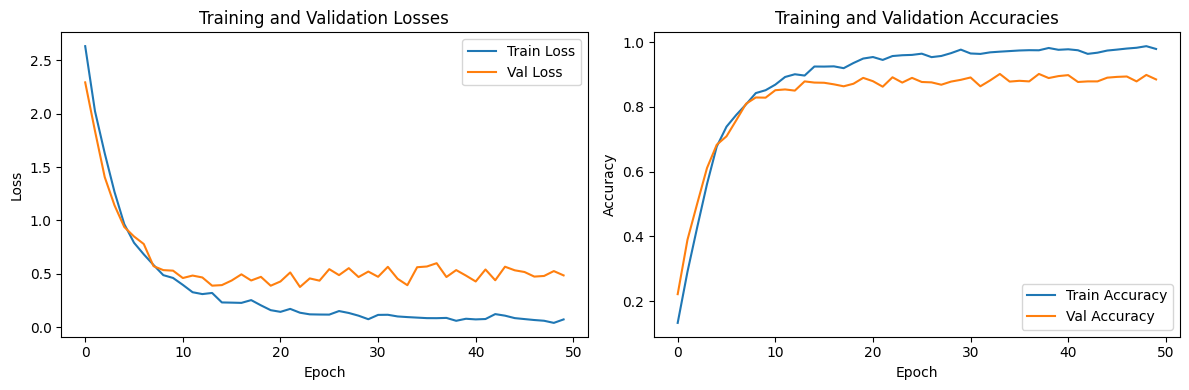

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from tqdm import tqdm
import pandas as pd
from PIL import Image
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Check if GPU is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define data transforms with 64x64 image size
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize to 64x64
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define the directory path
data_dir = r"C:\Users\user\Desktop\plant\boc"

# Load one CSV file
csv_file = 'fold_1_train.csv'

# Define a custom dataset class for CSV loading
class CustomDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        try:
            img_name = os.path.join(self.root_dir, str(self.data.iloc[idx, 0]))  # Access image_path using index 0
            image = Image.open(img_name).convert('RGB')  # Ensure images are in RGB mode
            label = self.data.iloc[idx, 1]  # Access class_label using index 1
        except Exception as e:
            print(f"Error accessing image at index {idx}: {e}")
            return None

        if self.transform:
            image = self.transform(image)

        return image, label

# Load the dataset using CustomDataset
dataset = CustomDataset(csv_file=os.path.join(data_dir, csv_file), root_dir=data_dir, transform=transform)

# Split dataset into train, validation, and test sets
train_size = 0.8
val_size = 0.1
test_size = 1 - train_size - val_size

train_dataset, temp_dataset = train_test_split(dataset, test_size=1 - train_size, random_state=42)
val_dataset, test_dataset = train_test_split(temp_dataset, test_size=test_size / (val_size + test_size), random_state=42)

# Create data loaders for each set
batch_size = 256
##train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
##val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
##test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



# Print class names (assuming it's available in the dataset)
print("Class Names:", pd.Series([data[1] for data in train_dataset]).unique())

# Define the model architecture
class AlexNet(nn.Module):
    def __init__(self, num_classes=15):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Instantiate the model
model = AlexNet(num_classes=15).to(device)

# Function to evaluate the model
def evaluate_model(model, data_loader, criterion, device):
    model.eval()
    loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avg_loss = loss / len(data_loader)
    accuracy = correct / total
    return avg_loss, accuracy

# Function to train the model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        # Use tqdm for progress display
        progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')
        
        for images, labels in progress_bar:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
            
            progress_bar.set_postfix({'Loss': running_loss / (total_train / batch_size), 'Accuracy': correct_train / total_train})
        
        avg_train_loss = running_loss / len(train_loader)
        train_accuracy = correct_train / total_train
        
        val_loss, val_accuracy = evaluate_model(model, val_loader, criterion, device)
        
        train_losses.append(avg_train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')
    
    return train_losses, val_losses, train_accuracies, val_accuracies

# Set hyperparameters
num_epochs = 50
learning_rate = 1e-3

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device)

# Evaluate on test set
test_loss, test_accuracy = evaluate_model(model, test_loader, criterion, device)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Plotting training and validation curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()

plt.tight_layout()
plt.show()


Class Names: [12  6 11  5 10  0 14  7  2  9  8 13  1  3  4]


Epoch 1/50: 100%|██████████| 104/104 [00:17<00:00,  5.81it/s, Loss=2.38, Accuracy=0.206]


Epoch [1/50], Train Loss: 2.3661, Train Accuracy: 0.2061, Val Loss: 2.0777, Val Accuracy: 0.2810


Epoch 2/50: 100%|██████████| 104/104 [00:17<00:00,  5.92it/s, Loss=1.76, Accuracy=0.397]


Epoch [2/50], Train Loss: 1.7443, Train Accuracy: 0.3970, Val Loss: 1.4990, Val Accuracy: 0.4882


Epoch 3/50: 100%|██████████| 104/104 [00:17<00:00,  6.09it/s, Loss=1.34, Accuracy=0.543]


Epoch [3/50], Train Loss: 1.3308, Train Accuracy: 0.5429, Val Loss: 1.1437, Val Accuracy: 0.6063


Epoch 4/50: 100%|██████████| 104/104 [00:15<00:00,  6.74it/s, Loss=1.02, Accuracy=0.661]


Epoch [4/50], Train Loss: 1.0105, Train Accuracy: 0.6608, Val Loss: 0.8670, Val Accuracy: 0.7159


Epoch 5/50: 100%|██████████| 104/104 [00:18<00:00,  5.69it/s, Loss=0.829, Accuracy=0.734]


Epoch [5/50], Train Loss: 0.8228, Train Accuracy: 0.7344, Val Loss: 0.8464, Val Accuracy: 0.7329


Epoch 6/50: 100%|██████████| 104/104 [00:19<00:00,  5.42it/s, Loss=0.699, Accuracy=0.777]


Epoch [6/50], Train Loss: 0.6938, Train Accuracy: 0.7774, Val Loss: 0.9417, Val Accuracy: 0.7087


Epoch 7/50: 100%|██████████| 104/104 [00:18<00:00,  5.60it/s, Loss=0.678, Accuracy=0.786]


Epoch [7/50], Train Loss: 0.6722, Train Accuracy: 0.7865, Val Loss: 0.5688, Val Accuracy: 0.8110


Epoch 8/50: 100%|██████████| 104/104 [00:18<00:00,  5.56it/s, Loss=0.525, Accuracy=0.833]


Epoch [8/50], Train Loss: 0.5211, Train Accuracy: 0.8330, Val Loss: 0.5630, Val Accuracy: 0.8256


Epoch 9/50: 100%|██████████| 104/104 [00:18<00:00,  5.52it/s, Loss=0.492, Accuracy=0.844]


Epoch [9/50], Train Loss: 0.4882, Train Accuracy: 0.8436, Val Loss: 0.4987, Val Accuracy: 0.8474


Epoch 10/50: 100%|██████████| 104/104 [00:18<00:00,  5.63it/s, Loss=0.435, Accuracy=0.863]


Epoch [10/50], Train Loss: 0.4313, Train Accuracy: 0.8633, Val Loss: 0.5771, Val Accuracy: 0.8371


Epoch 11/50: 100%|██████████| 104/104 [00:18<00:00,  5.73it/s, Loss=0.355, Accuracy=0.887]


Epoch [11/50], Train Loss: 0.3525, Train Accuracy: 0.8870, Val Loss: 0.5731, Val Accuracy: 0.8359


Epoch 12/50: 100%|██████████| 104/104 [00:18<00:00,  5.58it/s, Loss=0.336, Accuracy=0.894]


Epoch [12/50], Train Loss: 0.3339, Train Accuracy: 0.8938, Val Loss: 0.5991, Val Accuracy: 0.8316


Epoch 13/50: 100%|██████████| 104/104 [00:18<00:00,  5.52it/s, Loss=0.34, Accuracy=0.891] 


Epoch [13/50], Train Loss: 0.3372, Train Accuracy: 0.8908, Val Loss: 0.4760, Val Accuracy: 0.8686


Epoch 14/50: 100%|██████████| 104/104 [00:21<00:00,  4.94it/s, Loss=0.279, Accuracy=0.913]


Epoch [14/50], Train Loss: 0.2771, Train Accuracy: 0.9129, Val Loss: 0.4035, Val Accuracy: 0.8686


Epoch 15/50: 100%|██████████| 104/104 [00:21<00:00,  4.73it/s, Loss=0.263, Accuracy=0.917]


Epoch [15/50], Train Loss: 0.2610, Train Accuracy: 0.9167, Val Loss: 0.4042, Val Accuracy: 0.8776


Epoch 16/50: 100%|██████████| 104/104 [00:20<00:00,  5.02it/s, Loss=0.248, Accuracy=0.922]


Epoch [16/50], Train Loss: 0.2457, Train Accuracy: 0.9219, Val Loss: 0.4538, Val Accuracy: 0.8649


Epoch 17/50: 100%|██████████| 104/104 [00:21<00:00,  4.80it/s, Loss=0.247, Accuracy=0.925]


Epoch [17/50], Train Loss: 0.2450, Train Accuracy: 0.9246, Val Loss: 0.4890, Val Accuracy: 0.8589


Epoch 18/50: 100%|██████████| 104/104 [00:21<00:00,  4.85it/s, Loss=0.212, Accuracy=0.933]


Epoch [18/50], Train Loss: 0.2103, Train Accuracy: 0.9332, Val Loss: 0.9113, Val Accuracy: 0.7886


Epoch 19/50: 100%|██████████| 104/104 [00:33<00:00,  3.10it/s, Loss=0.284, Accuracy=0.914]


Epoch [19/50], Train Loss: 0.2819, Train Accuracy: 0.9144, Val Loss: 0.5006, Val Accuracy: 0.8783


Epoch 20/50: 100%|██████████| 104/104 [00:23<00:00,  4.40it/s, Loss=0.166, Accuracy=0.949]


Epoch [20/50], Train Loss: 0.1650, Train Accuracy: 0.9490, Val Loss: 0.5083, Val Accuracy: 0.8631


Epoch 21/50: 100%|██████████| 104/104 [00:20<00:00,  5.02it/s, Loss=0.173, Accuracy=0.949]


Epoch [21/50], Train Loss: 0.1714, Train Accuracy: 0.9490, Val Loss: 0.5500, Val Accuracy: 0.8601


Epoch 22/50: 100%|██████████| 104/104 [00:21<00:00,  4.91it/s, Loss=0.189, Accuracy=0.945]


Epoch [22/50], Train Loss: 0.1874, Train Accuracy: 0.9453, Val Loss: 0.5510, Val Accuracy: 0.8631


Epoch 23/50: 100%|██████████| 104/104 [00:21<00:00,  4.89it/s, Loss=0.183, Accuracy=0.948]


Epoch [23/50], Train Loss: 0.1814, Train Accuracy: 0.9479, Val Loss: 0.4917, Val Accuracy: 0.8667


Epoch 24/50: 100%|██████████| 104/104 [00:21<00:00,  4.80it/s, Loss=0.146, Accuracy=0.956]


Epoch [24/50], Train Loss: 0.1449, Train Accuracy: 0.9559, Val Loss: 0.5703, Val Accuracy: 0.8637


Epoch 25/50: 100%|██████████| 104/104 [00:20<00:00,  5.05it/s, Loss=0.163, Accuracy=0.952]


Epoch [25/50], Train Loss: 0.1621, Train Accuracy: 0.9518, Val Loss: 0.4342, Val Accuracy: 0.8855


Epoch 26/50: 100%|██████████| 104/104 [00:20<00:00,  4.96it/s, Loss=0.139, Accuracy=0.959]


Epoch [26/50], Train Loss: 0.1379, Train Accuracy: 0.9586, Val Loss: 0.6351, Val Accuracy: 0.8643


Epoch 27/50: 100%|██████████| 104/104 [00:21<00:00,  4.92it/s, Loss=0.139, Accuracy=0.957]


Epoch [27/50], Train Loss: 0.1384, Train Accuracy: 0.9572, Val Loss: 0.5604, Val Accuracy: 0.8643


Epoch 28/50: 100%|██████████| 104/104 [00:20<00:00,  5.02it/s, Loss=0.173, Accuracy=0.948]


Epoch [28/50], Train Loss: 0.1716, Train Accuracy: 0.9477, Val Loss: 0.5029, Val Accuracy: 0.8849


Epoch 29/50: 100%|██████████| 104/104 [00:20<00:00,  5.12it/s, Loss=0.123, Accuracy=0.963]


Epoch [29/50], Train Loss: 0.1223, Train Accuracy: 0.9630, Val Loss: 0.5530, Val Accuracy: 0.8813


Epoch 30/50: 100%|██████████| 104/104 [00:23<00:00,  4.39it/s, Loss=0.151, Accuracy=0.957]


Epoch [30/50], Train Loss: 0.1502, Train Accuracy: 0.9572, Val Loss: 0.4842, Val Accuracy: 0.8740


Epoch 31/50: 100%|██████████| 104/104 [00:24<00:00,  4.31it/s, Loss=0.105, Accuracy=0.969]


Epoch [31/50], Train Loss: 0.1044, Train Accuracy: 0.9687, Val Loss: 0.5783, Val Accuracy: 0.8680


Epoch 32/50: 100%|██████████| 104/104 [00:24<00:00,  4.25it/s, Loss=0.141, Accuracy=0.96]


Epoch [32/50], Train Loss: 0.1399, Train Accuracy: 0.9601, Val Loss: 0.5195, Val Accuracy: 0.8855


Epoch 33/50: 100%|██████████| 104/104 [00:25<00:00,  4.13it/s, Loss=0.135, Accuracy=0.962]


Epoch [33/50], Train Loss: 0.1343, Train Accuracy: 0.9621, Val Loss: 0.6375, Val Accuracy: 0.8661


Epoch 34/50: 100%|██████████| 104/104 [00:25<00:00,  4.13it/s, Loss=0.119, Accuracy=0.964]


Epoch [34/50], Train Loss: 0.1184, Train Accuracy: 0.9641, Val Loss: 0.6240, Val Accuracy: 0.8686


Epoch 35/50: 100%|██████████| 104/104 [00:24<00:00,  4.19it/s, Loss=0.149, Accuracy=0.957]


Epoch [35/50], Train Loss: 0.1479, Train Accuracy: 0.9568, Val Loss: 0.6271, Val Accuracy: 0.8328


Epoch 36/50: 100%|██████████| 104/104 [00:24<00:00,  4.25it/s, Loss=0.153, Accuracy=0.959]


Epoch [36/50], Train Loss: 0.1521, Train Accuracy: 0.9585, Val Loss: 0.4831, Val Accuracy: 0.8740


Epoch 37/50: 100%|██████████| 104/104 [00:24<00:00,  4.31it/s, Loss=0.13, Accuracy=0.962]


Epoch [37/50], Train Loss: 0.1286, Train Accuracy: 0.9619, Val Loss: 0.5946, Val Accuracy: 0.8558


Epoch 38/50: 100%|██████████| 104/104 [00:24<00:00,  4.22it/s, Loss=0.115, Accuracy=0.969]


Epoch [38/50], Train Loss: 0.1141, Train Accuracy: 0.9687, Val Loss: 0.7225, Val Accuracy: 0.8546


Epoch 39/50: 100%|██████████| 104/104 [00:26<00:00,  3.90it/s, Loss=0.122, Accuracy=0.969]


Epoch [39/50], Train Loss: 0.1213, Train Accuracy: 0.9690, Val Loss: 0.6196, Val Accuracy: 0.8492


Epoch 40/50: 100%|██████████| 104/104 [00:25<00:00,  4.01it/s, Loss=0.142, Accuracy=0.96]


Epoch [40/50], Train Loss: 0.1407, Train Accuracy: 0.9601, Val Loss: 0.5811, Val Accuracy: 0.8746


Epoch 41/50: 100%|██████████| 104/104 [00:24<00:00,  4.20it/s, Loss=0.119, Accuracy=0.965]


Epoch [41/50], Train Loss: 0.1177, Train Accuracy: 0.9650, Val Loss: 0.5876, Val Accuracy: 0.8910


Epoch 42/50: 100%|██████████| 104/104 [00:24<00:00,  4.17it/s, Loss=0.11, Accuracy=0.967] 


Epoch [42/50], Train Loss: 0.1087, Train Accuracy: 0.9674, Val Loss: 0.5676, Val Accuracy: 0.8825


Epoch 43/50: 100%|██████████| 104/104 [00:24<00:00,  4.19it/s, Loss=0.116, Accuracy=0.97] 


Epoch [43/50], Train Loss: 0.1151, Train Accuracy: 0.9698, Val Loss: 0.7996, Val Accuracy: 0.8353


Epoch 44/50: 100%|██████████| 104/104 [00:24<00:00,  4.24it/s, Loss=0.139, Accuracy=0.961]


Epoch [44/50], Train Loss: 0.1377, Train Accuracy: 0.9611, Val Loss: 0.6096, Val Accuracy: 0.8734


Epoch 45/50: 100%|██████████| 104/104 [00:26<00:00,  3.87it/s, Loss=0.105, Accuracy=0.972]


Epoch [45/50], Train Loss: 0.1044, Train Accuracy: 0.9717, Val Loss: 0.5592, Val Accuracy: 0.8849


Epoch 46/50: 100%|██████████| 104/104 [00:24<00:00,  4.17it/s, Loss=0.152, Accuracy=0.963]


Epoch [46/50], Train Loss: 0.1504, Train Accuracy: 0.9627, Val Loss: 0.6567, Val Accuracy: 0.8528


Epoch 47/50: 100%|██████████| 104/104 [00:26<00:00,  3.89it/s, Loss=0.153, Accuracy=0.96] 


Epoch [47/50], Train Loss: 0.1518, Train Accuracy: 0.9603, Val Loss: 0.5466, Val Accuracy: 0.8801


Epoch 48/50: 100%|██████████| 104/104 [00:25<00:00,  4.15it/s, Loss=0.0947, Accuracy=0.973]


Epoch [48/50], Train Loss: 0.0939, Train Accuracy: 0.9727, Val Loss: 0.6267, Val Accuracy: 0.8910


Epoch 49/50: 100%|██████████| 104/104 [00:25<00:00,  4.15it/s, Loss=0.0631, Accuracy=0.982]


Epoch [49/50], Train Loss: 0.0626, Train Accuracy: 0.9822, Val Loss: 0.6949, Val Accuracy: 0.8789


Epoch 50/50: 100%|██████████| 104/104 [00:25<00:00,  4.13it/s, Loss=0.0745, Accuracy=0.982]


Epoch [50/50], Train Loss: 0.0740, Train Accuracy: 0.9821, Val Loss: 0.6579, Val Accuracy: 0.8783
Test Loss: 0.8256, Test Accuracy: 0.8607


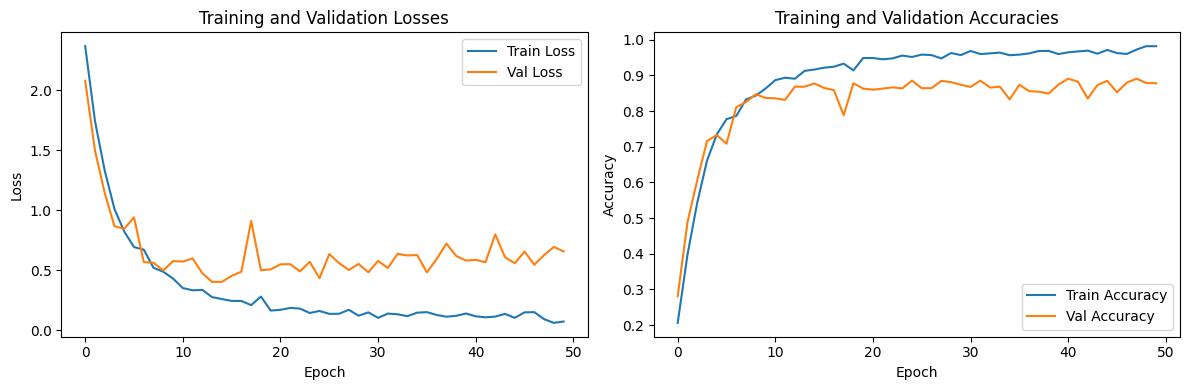

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from tqdm import tqdm
import pandas as pd
from PIL import Image
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Check if GPU is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define data transforms with 64x64 image size
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize to 64x64
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define the directory path
data_dir = r"C:\Users\user\Desktop\plant\boc"

# Load one CSV file
csv_file = 'fold_2_train.csv'

# Define a custom dataset class for CSV loading
class CustomDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        try:
            img_name = os.path.join(self.root_dir, str(self.data.iloc[idx, 0]))  # Access image_path using index 0
            image = Image.open(img_name).convert('RGB')  # Ensure images are in RGB mode
            label = self.data.iloc[idx, 1]  # Access class_label using index 1
        except Exception as e:
            print(f"Error accessing image at index {idx}: {e}")
            return None

        if self.transform:
            image = self.transform(image)

        return image, label

# Load the dataset using CustomDataset
dataset = CustomDataset(csv_file=os.path.join(data_dir, csv_file), root_dir=data_dir, transform=transform)

# Split dataset into train, validation, and test sets
train_size = 0.8
val_size = 0.1
test_size = 1 - train_size - val_size

train_dataset, temp_dataset = train_test_split(dataset, test_size=1 - train_size, random_state=42)
val_dataset, test_dataset = train_test_split(temp_dataset, test_size=test_size / (val_size + test_size), random_state=42)

# Create data loaders for each set
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)



# Print class names (assuming it's available in the dataset)
print("Class Names:", pd.Series([data[1] for data in train_dataset]).unique())

# Define the model architecture
class AlexNet(nn.Module):
    def __init__(self, num_classes=15):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Instantiate the model
model = AlexNet(num_classes=15).to(device)

# Function to evaluate the model
def evaluate_model(model, data_loader, criterion, device):
    model.eval()
    loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avg_loss = loss / len(data_loader)
    accuracy = correct / total
    return avg_loss, accuracy

# Function to train the model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        # Use tqdm for progress display
        progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')
        
        for images, labels in progress_bar:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
            
            progress_bar.set_postfix({'Loss': running_loss / (total_train / batch_size), 'Accuracy': correct_train / total_train})
        
        avg_train_loss = running_loss / len(train_loader)
        train_accuracy = correct_train / total_train
        
        val_loss, val_accuracy = evaluate_model(model, val_loader, criterion, device)
        
        train_losses.append(avg_train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')
    
    return train_losses, val_losses, train_accuracies, val_accuracies

# Set hyperparameters
num_epochs = 50
learning_rate = 1e-3

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device)

# Evaluate on test set
test_loss, test_accuracy = evaluate_model(model, test_loader, criterion, device)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Plotting training and validation curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()

plt.tight_layout()
plt.show()


Class Names: [12  6 11  5 10  0 14  7  2  9  8 13  1  3  4]


Epoch 1/50: 100%|██████████| 104/104 [00:28<00:00,  3.60it/s, Loss=2.36, Accuracy=0.202]


Epoch [1/50], Train Loss: 2.3373, Train Accuracy: 0.2019, Val Loss: 1.9536, Val Accuracy: 0.3574


Epoch 2/50: 100%|██████████| 104/104 [00:16<00:00,  6.18it/s, Loss=1.75, Accuracy=0.412]


Epoch [2/50], Train Loss: 1.7326, Train Accuracy: 0.4123, Val Loss: 1.8331, Val Accuracy: 0.4276


Epoch 3/50: 100%|██████████| 104/104 [00:16<00:00,  6.20it/s, Loss=1.34, Accuracy=0.542]


Epoch [3/50], Train Loss: 1.3291, Train Accuracy: 0.5421, Val Loss: 1.1087, Val Accuracy: 0.6311


Epoch 4/50: 100%|██████████| 104/104 [00:16<00:00,  6.30it/s, Loss=1.08, Accuracy=0.638]


Epoch [4/50], Train Loss: 1.0687, Train Accuracy: 0.6385, Val Loss: 1.0114, Val Accuracy: 0.6796


Epoch 5/50: 100%|██████████| 104/104 [00:16<00:00,  6.26it/s, Loss=0.894, Accuracy=0.705]


Epoch [5/50], Train Loss: 0.8874, Train Accuracy: 0.7048, Val Loss: 1.0358, Val Accuracy: 0.6638


Epoch 6/50: 100%|██████████| 104/104 [00:18<00:00,  5.61it/s, Loss=0.783, Accuracy=0.746]


Epoch [6/50], Train Loss: 0.7768, Train Accuracy: 0.7464, Val Loss: 0.6508, Val Accuracy: 0.7844


Epoch 7/50: 100%|██████████| 104/104 [00:16<00:00,  6.23it/s, Loss=0.659, Accuracy=0.787]


Epoch [7/50], Train Loss: 0.6537, Train Accuracy: 0.7870, Val Loss: 0.7450, Val Accuracy: 0.7571


Epoch 8/50: 100%|██████████| 104/104 [00:14<00:00,  7.17it/s, Loss=0.596, Accuracy=0.805]


Epoch [8/50], Train Loss: 0.5911, Train Accuracy: 0.8055, Val Loss: 0.8101, Val Accuracy: 0.7462


Epoch 9/50: 100%|██████████| 104/104 [00:16<00:00,  6.42it/s, Loss=0.542, Accuracy=0.826]


Epoch [9/50], Train Loss: 0.5381, Train Accuracy: 0.8262, Val Loss: 0.6655, Val Accuracy: 0.7947


Epoch 10/50: 100%|██████████| 104/104 [00:15<00:00,  6.71it/s, Loss=0.493, Accuracy=0.842]


Epoch [10/50], Train Loss: 0.4894, Train Accuracy: 0.8420, Val Loss: 0.5999, Val Accuracy: 0.8159


Epoch 11/50: 100%|██████████| 104/104 [00:14<00:00,  7.15it/s, Loss=0.429, Accuracy=0.862]


Epoch [11/50], Train Loss: 0.4261, Train Accuracy: 0.8615, Val Loss: 0.5966, Val Accuracy: 0.8128


Epoch 12/50: 100%|██████████| 104/104 [00:15<00:00,  6.68it/s, Loss=0.416, Accuracy=0.867]


Epoch [12/50], Train Loss: 0.4131, Train Accuracy: 0.8674, Val Loss: 0.6337, Val Accuracy: 0.8207


Epoch 13/50: 100%|██████████| 104/104 [00:16<00:00,  6.33it/s, Loss=0.373, Accuracy=0.878]


Epoch [13/50], Train Loss: 0.3700, Train Accuracy: 0.8785, Val Loss: 0.6350, Val Accuracy: 0.8153


Epoch 14/50: 100%|██████████| 104/104 [00:18<00:00,  5.50it/s, Loss=0.382, Accuracy=0.878]


Epoch [14/50], Train Loss: 0.3793, Train Accuracy: 0.8778, Val Loss: 0.6071, Val Accuracy: 0.8534


Epoch 15/50: 100%|██████████| 104/104 [00:16<00:00,  6.45it/s, Loss=0.327, Accuracy=0.897]


Epoch [15/50], Train Loss: 0.3246, Train Accuracy: 0.8967, Val Loss: 0.4960, Val Accuracy: 0.8637


Epoch 16/50: 100%|██████████| 104/104 [00:15<00:00,  6.60it/s, Loss=0.259, Accuracy=0.914]


Epoch [16/50], Train Loss: 0.2572, Train Accuracy: 0.9136, Val Loss: 0.6652, Val Accuracy: 0.8395


Epoch 17/50: 100%|██████████| 104/104 [00:15<00:00,  6.70it/s, Loss=0.287, Accuracy=0.912]


Epoch [17/50], Train Loss: 0.2848, Train Accuracy: 0.9116, Val Loss: 0.4877, Val Accuracy: 0.8583


Epoch 18/50: 100%|██████████| 104/104 [00:15<00:00,  6.78it/s, Loss=0.29, Accuracy=0.906] 


Epoch [18/50], Train Loss: 0.2881, Train Accuracy: 0.9060, Val Loss: 0.4474, Val Accuracy: 0.8770


Epoch 19/50: 100%|██████████| 104/104 [00:16<00:00,  6.33it/s, Loss=0.246, Accuracy=0.922]


Epoch [19/50], Train Loss: 0.2445, Train Accuracy: 0.9225, Val Loss: 0.5088, Val Accuracy: 0.8528


Epoch 20/50: 100%|██████████| 104/104 [00:15<00:00,  6.78it/s, Loss=0.251, Accuracy=0.919]


Epoch [20/50], Train Loss: 0.2486, Train Accuracy: 0.9193, Val Loss: 0.5551, Val Accuracy: 0.8577


Epoch 21/50: 100%|██████████| 104/104 [00:15<00:00,  6.58it/s, Loss=0.215, Accuracy=0.931]


Epoch [21/50], Train Loss: 0.2138, Train Accuracy: 0.9311, Val Loss: 0.5285, Val Accuracy: 0.8601


Epoch 22/50: 100%|██████████| 104/104 [00:15<00:00,  6.63it/s, Loss=0.224, Accuracy=0.927]


Epoch [22/50], Train Loss: 0.2223, Train Accuracy: 0.9272, Val Loss: 0.5991, Val Accuracy: 0.8698


Epoch 23/50: 100%|██████████| 104/104 [00:17<00:00,  5.97it/s, Loss=0.208, Accuracy=0.935]


Epoch [23/50], Train Loss: 0.2061, Train Accuracy: 0.9353, Val Loss: 0.5569, Val Accuracy: 0.8631


Epoch 24/50: 100%|██████████| 104/104 [00:15<00:00,  6.58it/s, Loss=0.16, Accuracy=0.951]


Epoch [24/50], Train Loss: 0.1583, Train Accuracy: 0.9506, Val Loss: 0.5667, Val Accuracy: 0.8583


Epoch 25/50: 100%|██████████| 104/104 [00:15<00:00,  6.60it/s, Loss=0.193, Accuracy=0.943]


Epoch [25/50], Train Loss: 0.1915, Train Accuracy: 0.9425, Val Loss: 0.5505, Val Accuracy: 0.8498


Epoch 26/50: 100%|██████████| 104/104 [00:16<00:00,  6.33it/s, Loss=0.217, Accuracy=0.936]


Epoch [26/50], Train Loss: 0.2151, Train Accuracy: 0.9356, Val Loss: 0.5773, Val Accuracy: 0.8649


Epoch 27/50: 100%|██████████| 104/104 [00:18<00:00,  5.71it/s, Loss=0.161, Accuracy=0.951]


Epoch [27/50], Train Loss: 0.1599, Train Accuracy: 0.9509, Val Loss: 0.5815, Val Accuracy: 0.8667


Epoch 28/50: 100%|██████████| 104/104 [00:18<00:00,  5.51it/s, Loss=0.183, Accuracy=0.943]


Epoch [28/50], Train Loss: 0.1812, Train Accuracy: 0.9429, Val Loss: 0.5109, Val Accuracy: 0.8740


Epoch 29/50: 100%|██████████| 104/104 [00:17<00:00,  5.88it/s, Loss=0.208, Accuracy=0.936]


Epoch [29/50], Train Loss: 0.2062, Train Accuracy: 0.9357, Val Loss: 0.4888, Val Accuracy: 0.8655


Epoch 30/50: 100%|██████████| 104/104 [00:16<00:00,  6.19it/s, Loss=0.176, Accuracy=0.947]


Epoch [30/50], Train Loss: 0.1744, Train Accuracy: 0.9467, Val Loss: 0.5443, Val Accuracy: 0.8643


Epoch 31/50: 100%|██████████| 104/104 [00:16<00:00,  6.26it/s, Loss=0.183, Accuracy=0.946]


Epoch [31/50], Train Loss: 0.1817, Train Accuracy: 0.9462, Val Loss: 0.6850, Val Accuracy: 0.8443


Epoch 32/50: 100%|██████████| 104/104 [00:17<00:00,  6.07it/s, Loss=0.155, Accuracy=0.953]


Epoch [32/50], Train Loss: 0.1541, Train Accuracy: 0.9528, Val Loss: 0.6175, Val Accuracy: 0.8583


Epoch 33/50: 100%|██████████| 104/104 [00:18<00:00,  5.60it/s, Loss=0.22, Accuracy=0.94] 


Epoch [33/50], Train Loss: 0.2185, Train Accuracy: 0.9403, Val Loss: 0.5629, Val Accuracy: 0.8625


Epoch 34/50: 100%|██████████| 104/104 [00:17<00:00,  5.93it/s, Loss=0.119, Accuracy=0.964]


Epoch [34/50], Train Loss: 0.1185, Train Accuracy: 0.9636, Val Loss: 0.6046, Val Accuracy: 0.8813


Epoch 35/50: 100%|██████████| 104/104 [00:18<00:00,  5.56it/s, Loss=0.121, Accuracy=0.963]


Epoch [35/50], Train Loss: 0.1198, Train Accuracy: 0.9632, Val Loss: 0.5602, Val Accuracy: 0.8776


Epoch 36/50: 100%|██████████| 104/104 [00:24<00:00,  4.31it/s, Loss=0.112, Accuracy=0.968]


Epoch [36/50], Train Loss: 0.1108, Train Accuracy: 0.9676, Val Loss: 0.8026, Val Accuracy: 0.8510


Epoch 37/50: 100%|██████████| 104/104 [00:23<00:00,  4.36it/s, Loss=0.167, Accuracy=0.951]


Epoch [37/50], Train Loss: 0.1661, Train Accuracy: 0.9507, Val Loss: 0.5678, Val Accuracy: 0.8752


Epoch 38/50: 100%|██████████| 104/104 [00:22<00:00,  4.57it/s, Loss=0.126, Accuracy=0.962]


Epoch [38/50], Train Loss: 0.1254, Train Accuracy: 0.9618, Val Loss: 0.6044, Val Accuracy: 0.8722


Epoch 39/50: 100%|██████████| 104/104 [00:24<00:00,  4.30it/s, Loss=0.139, Accuracy=0.959]


Epoch [39/50], Train Loss: 0.1378, Train Accuracy: 0.9593, Val Loss: 0.5371, Val Accuracy: 0.8758


Epoch 40/50: 100%|██████████| 104/104 [00:23<00:00,  4.44it/s, Loss=0.132, Accuracy=0.96]


Epoch [40/50], Train Loss: 0.1309, Train Accuracy: 0.9604, Val Loss: 0.5290, Val Accuracy: 0.8867


Epoch 41/50: 100%|██████████| 104/104 [00:22<00:00,  4.56it/s, Loss=0.13, Accuracy=0.964] 


Epoch [41/50], Train Loss: 0.1293, Train Accuracy: 0.9640, Val Loss: 0.8437, Val Accuracy: 0.8340


Epoch 42/50: 100%|██████████| 104/104 [00:22<00:00,  4.63it/s, Loss=0.198, Accuracy=0.947]


Epoch [42/50], Train Loss: 0.1968, Train Accuracy: 0.9471, Val Loss: 0.6141, Val Accuracy: 0.8643


Epoch 43/50: 100%|██████████| 104/104 [00:22<00:00,  4.54it/s, Loss=0.103, Accuracy=0.971]


Epoch [43/50], Train Loss: 0.1020, Train Accuracy: 0.9711, Val Loss: 0.5622, Val Accuracy: 0.8934


Epoch 44/50: 100%|██████████| 104/104 [00:20<00:00,  4.99it/s, Loss=0.117, Accuracy=0.965]


Epoch [44/50], Train Loss: 0.1164, Train Accuracy: 0.9654, Val Loss: 0.5418, Val Accuracy: 0.8886


Epoch 45/50: 100%|██████████| 104/104 [00:21<00:00,  4.92it/s, Loss=0.131, Accuracy=0.964]


Epoch [45/50], Train Loss: 0.1298, Train Accuracy: 0.9639, Val Loss: 0.5862, Val Accuracy: 0.8807


Epoch 46/50: 100%|██████████| 104/104 [00:22<00:00,  4.69it/s, Loss=0.127, Accuracy=0.962]


Epoch [46/50], Train Loss: 0.1256, Train Accuracy: 0.9619, Val Loss: 0.5850, Val Accuracy: 0.8764


Epoch 47/50: 100%|██████████| 104/104 [00:21<00:00,  4.89it/s, Loss=0.159, Accuracy=0.956]


Epoch [47/50], Train Loss: 0.1579, Train Accuracy: 0.9562, Val Loss: 0.5647, Val Accuracy: 0.8546


Epoch 48/50: 100%|██████████| 104/104 [00:20<00:00,  4.99it/s, Loss=0.131, Accuracy=0.962]


Epoch [48/50], Train Loss: 0.1300, Train Accuracy: 0.9620, Val Loss: 0.7447, Val Accuracy: 0.8680


Epoch 49/50: 100%|██████████| 104/104 [00:21<00:00,  4.89it/s, Loss=0.136, Accuracy=0.964]


Epoch [49/50], Train Loss: 0.1348, Train Accuracy: 0.9643, Val Loss: 0.6905, Val Accuracy: 0.8504


Epoch 50/50: 100%|██████████| 104/104 [00:20<00:00,  5.07it/s, Loss=0.112, Accuracy=0.969]


Epoch [50/50], Train Loss: 0.1112, Train Accuracy: 0.9690, Val Loss: 0.5588, Val Accuracy: 0.8752
Test Loss: 0.5195, Test Accuracy: 0.8867


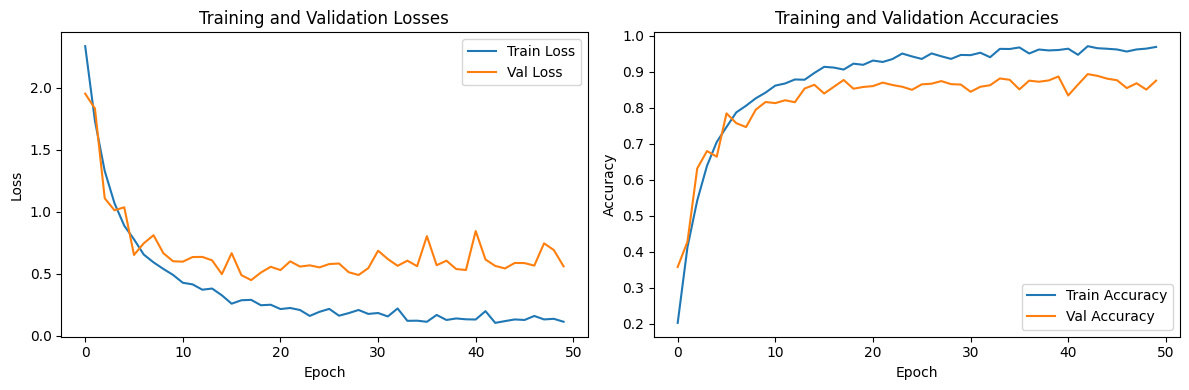

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from tqdm import tqdm
import pandas as pd
from PIL import Image
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Check if GPU is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define data transforms with 64x64 image size
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize to 64x64
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define the directory path
data_dir = r"C:\Users\user\Desktop\plant\boc"

# Load one CSV file
csv_file = 'fold_3_train.csv'

# Define a custom dataset class for CSV loading
class CustomDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        try:
            img_name = os.path.join(self.root_dir, str(self.data.iloc[idx, 0]))  # Access image_path using index 0
            image = Image.open(img_name).convert('RGB')  # Ensure images are in RGB mode
            label = self.data.iloc[idx, 1]  # Access class_label using index 1
        except Exception as e:
            print(f"Error accessing image at index {idx}: {e}")
            return None

        if self.transform:
            image = self.transform(image)

        return image, label

# Load the dataset using CustomDataset
dataset = CustomDataset(csv_file=os.path.join(data_dir, csv_file), root_dir=data_dir, transform=transform)

# Split dataset into train, validation, and test sets
train_size = 0.8
val_size = 0.1
test_size = 1 - train_size - val_size

train_dataset, temp_dataset = train_test_split(dataset, test_size=1 - train_size, random_state=42)
val_dataset, test_dataset = train_test_split(temp_dataset, test_size=test_size / (val_size + test_size), random_state=42)

# Create data loaders for each set
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)



# Print class names (assuming it's available in the dataset)
print("Class Names:", pd.Series([data[1] for data in train_dataset]).unique())

# Define the model architecture
class AlexNet(nn.Module):
    def __init__(self, num_classes=15):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Instantiate the model
model = AlexNet(num_classes=15).to(device)

# Function to evaluate the model
def evaluate_model(model, data_loader, criterion, device):
    model.eval()
    loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avg_loss = loss / len(data_loader)
    accuracy = correct / total
    return avg_loss, accuracy

# Function to train the model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        # Use tqdm for progress display
        progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')
        
        for images, labels in progress_bar:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
            
            progress_bar.set_postfix({'Loss': running_loss / (total_train / batch_size), 'Accuracy': correct_train / total_train})
        
        avg_train_loss = running_loss / len(train_loader)
        train_accuracy = correct_train / total_train
        
        val_loss, val_accuracy = evaluate_model(model, val_loader, criterion, device)
        
        train_losses.append(avg_train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')
    
    return train_losses, val_losses, train_accuracies, val_accuracies

# Set hyperparameters
num_epochs = 50
learning_rate = 1e-3

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device)

# Evaluate on test set
test_loss, test_accuracy = evaluate_model(model, test_loader, criterion, device)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Plotting training and validation curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()

plt.tight_layout()
plt.show()


Class Names: [12  6 14  5  7  0 13  2 11  9  8  1 10  4  3]


Epoch 1/50: 100%|██████████| 104/104 [00:22<00:00,  4.60it/s, Loss=2.27, Accuracy=0.227]


Epoch [1/50], Train Loss: 2.2520, Train Accuracy: 0.2265, Val Loss: 1.7472, Val Accuracy: 0.3610


Epoch 2/50: 100%|██████████| 104/104 [00:17<00:00,  5.99it/s, Loss=1.54, Accuracy=0.459]


Epoch [2/50], Train Loss: 1.5294, Train Accuracy: 0.4592, Val Loss: 1.4545, Val Accuracy: 0.5239


Epoch 3/50: 100%|██████████| 104/104 [00:16<00:00,  6.17it/s, Loss=1.2, Accuracy=0.593]


Epoch [3/50], Train Loss: 1.1935, Train Accuracy: 0.5934, Val Loss: 1.0798, Val Accuracy: 0.6414


Epoch 4/50: 100%|██████████| 104/104 [00:19<00:00,  5.31it/s, Loss=0.942, Accuracy=0.694]


Epoch [4/50], Train Loss: 0.9349, Train Accuracy: 0.6938, Val Loss: 1.0181, Val Accuracy: 0.6590


Epoch 5/50: 100%|██████████| 104/104 [00:17<00:00,  6.01it/s, Loss=0.758, Accuracy=0.756]


Epoch [5/50], Train Loss: 0.7518, Train Accuracy: 0.7555, Val Loss: 0.8901, Val Accuracy: 0.7177


Epoch 6/50: 100%|██████████| 104/104 [00:17<00:00,  5.94it/s, Loss=0.655, Accuracy=0.79] 


Epoch [6/50], Train Loss: 0.6501, Train Accuracy: 0.7900, Val Loss: 0.7161, Val Accuracy: 0.7668


Epoch 7/50: 100%|██████████| 104/104 [00:15<00:00,  6.55it/s, Loss=0.535, Accuracy=0.82] 


Epoch [7/50], Train Loss: 0.5309, Train Accuracy: 0.8205, Val Loss: 0.6582, Val Accuracy: 0.7983


Epoch 8/50: 100%|██████████| 104/104 [00:17<00:00,  5.92it/s, Loss=0.491, Accuracy=0.839]


Epoch [8/50], Train Loss: 0.4870, Train Accuracy: 0.8387, Val Loss: 0.7109, Val Accuracy: 0.7820


Epoch 9/50: 100%|██████████| 104/104 [00:17<00:00,  5.89it/s, Loss=0.458, Accuracy=0.854]


Epoch [9/50], Train Loss: 0.4549, Train Accuracy: 0.8542, Val Loss: 0.6423, Val Accuracy: 0.8122


Epoch 10/50: 100%|██████████| 104/104 [00:17<00:00,  6.05it/s, Loss=0.418, Accuracy=0.864]


Epoch [10/50], Train Loss: 0.4144, Train Accuracy: 0.8639, Val Loss: 0.6184, Val Accuracy: 0.8177


Epoch 11/50: 100%|██████████| 104/104 [00:18<00:00,  5.77it/s, Loss=0.369, Accuracy=0.883]


Epoch [11/50], Train Loss: 0.3656, Train Accuracy: 0.8830, Val Loss: 0.5161, Val Accuracy: 0.8419


Epoch 12/50: 100%|██████████| 104/104 [00:20<00:00,  4.97it/s, Loss=0.352, Accuracy=0.889]


Epoch [12/50], Train Loss: 0.3496, Train Accuracy: 0.8889, Val Loss: 0.5962, Val Accuracy: 0.8128


Epoch 13/50: 100%|██████████| 104/104 [00:17<00:00,  5.98it/s, Loss=0.306, Accuracy=0.903]


Epoch [13/50], Train Loss: 0.3033, Train Accuracy: 0.9028, Val Loss: 0.4994, Val Accuracy: 0.8462


Epoch 14/50: 100%|██████████| 104/104 [00:19<00:00,  5.25it/s, Loss=0.294, Accuracy=0.905]


Epoch [14/50], Train Loss: 0.2915, Train Accuracy: 0.9052, Val Loss: 0.5314, Val Accuracy: 0.8443


Epoch 15/50: 100%|██████████| 104/104 [00:18<00:00,  5.71it/s, Loss=0.275, Accuracy=0.91]


Epoch [15/50], Train Loss: 0.2733, Train Accuracy: 0.9096, Val Loss: 0.5811, Val Accuracy: 0.8334


Epoch 16/50: 100%|██████████| 104/104 [00:17<00:00,  5.87it/s, Loss=0.242, Accuracy=0.921]


Epoch [16/50], Train Loss: 0.2397, Train Accuracy: 0.9209, Val Loss: 0.7130, Val Accuracy: 0.8383


Epoch 17/50: 100%|██████████| 104/104 [00:18<00:00,  5.61it/s, Loss=0.263, Accuracy=0.918]


Epoch [17/50], Train Loss: 0.2605, Train Accuracy: 0.9178, Val Loss: 0.5853, Val Accuracy: 0.8437


Epoch 18/50: 100%|██████████| 104/104 [00:17<00:00,  5.87it/s, Loss=0.226, Accuracy=0.929]


Epoch [18/50], Train Loss: 0.2239, Train Accuracy: 0.9293, Val Loss: 0.5066, Val Accuracy: 0.8674


Epoch 19/50: 100%|██████████| 104/104 [00:17<00:00,  5.86it/s, Loss=0.222, Accuracy=0.931]


Epoch [19/50], Train Loss: 0.2207, Train Accuracy: 0.9310, Val Loss: 0.5189, Val Accuracy: 0.8558


Epoch 20/50: 100%|██████████| 104/104 [00:19<00:00,  5.24it/s, Loss=0.2, Accuracy=0.936] 


Epoch [20/50], Train Loss: 0.1983, Train Accuracy: 0.9359, Val Loss: 0.5012, Val Accuracy: 0.8625


Epoch 21/50: 100%|██████████| 104/104 [00:18<00:00,  5.76it/s, Loss=0.222, Accuracy=0.932]


Epoch [21/50], Train Loss: 0.2206, Train Accuracy: 0.9320, Val Loss: 0.5875, Val Accuracy: 0.8455


Epoch 22/50: 100%|██████████| 104/104 [00:18<00:00,  5.73it/s, Loss=0.194, Accuracy=0.94]


Epoch [22/50], Train Loss: 0.1929, Train Accuracy: 0.9395, Val Loss: 0.5213, Val Accuracy: 0.8686


Epoch 23/50: 100%|██████████| 104/104 [00:17<00:00,  5.86it/s, Loss=0.195, Accuracy=0.937]


Epoch [23/50], Train Loss: 0.1931, Train Accuracy: 0.9372, Val Loss: 0.5521, Val Accuracy: 0.8522


Epoch 24/50: 100%|██████████| 104/104 [00:17<00:00,  5.87it/s, Loss=0.184, Accuracy=0.946]


Epoch [24/50], Train Loss: 0.1822, Train Accuracy: 0.9459, Val Loss: 0.5157, Val Accuracy: 0.8752


Epoch 25/50: 100%|██████████| 104/104 [00:21<00:00,  4.94it/s, Loss=0.152, Accuracy=0.953]


Epoch [25/50], Train Loss: 0.1508, Train Accuracy: 0.9529, Val Loss: 0.4620, Val Accuracy: 0.8831


Epoch 26/50: 100%|██████████| 104/104 [00:19<00:00,  5.44it/s, Loss=0.114, Accuracy=0.965]


Epoch [26/50], Train Loss: 0.1135, Train Accuracy: 0.9654, Val Loss: 0.5067, Val Accuracy: 0.8861


Epoch 27/50: 100%|██████████| 104/104 [00:18<00:00,  5.57it/s, Loss=0.154, Accuracy=0.954]


Epoch [27/50], Train Loss: 0.1526, Train Accuracy: 0.9542, Val Loss: 0.5406, Val Accuracy: 0.8680


Epoch 28/50: 100%|██████████| 104/104 [00:17<00:00,  6.02it/s, Loss=0.149, Accuracy=0.953]


Epoch [28/50], Train Loss: 0.1483, Train Accuracy: 0.9532, Val Loss: 0.6281, Val Accuracy: 0.8667


Epoch 29/50: 100%|██████████| 104/104 [00:18<00:00,  5.74it/s, Loss=0.152, Accuracy=0.954]


Epoch [29/50], Train Loss: 0.1508, Train Accuracy: 0.9537, Val Loss: 0.5536, Val Accuracy: 0.8698


Epoch 30/50: 100%|██████████| 104/104 [00:18<00:00,  5.59it/s, Loss=0.13, Accuracy=0.961] 


Epoch [30/50], Train Loss: 0.1286, Train Accuracy: 0.9606, Val Loss: 0.8088, Val Accuracy: 0.8413


Epoch 31/50: 100%|██████████| 104/104 [00:18<00:00,  5.50it/s, Loss=0.149, Accuracy=0.956]


Epoch [31/50], Train Loss: 0.1482, Train Accuracy: 0.9561, Val Loss: 0.6279, Val Accuracy: 0.8692


Epoch 32/50: 100%|██████████| 104/104 [00:17<00:00,  5.79it/s, Loss=0.158, Accuracy=0.955]


Epoch [32/50], Train Loss: 0.1571, Train Accuracy: 0.9553, Val Loss: 0.6132, Val Accuracy: 0.8558


Epoch 33/50: 100%|██████████| 104/104 [00:23<00:00,  4.37it/s, Loss=0.159, Accuracy=0.954]


Epoch [33/50], Train Loss: 0.1580, Train Accuracy: 0.9544, Val Loss: 0.5580, Val Accuracy: 0.8861


Epoch 34/50: 100%|██████████| 104/104 [00:20<00:00,  5.10it/s, Loss=0.123, Accuracy=0.966]


Epoch [34/50], Train Loss: 0.1220, Train Accuracy: 0.9657, Val Loss: 0.4956, Val Accuracy: 0.8789


Epoch 35/50: 100%|██████████| 104/104 [00:20<00:00,  4.98it/s, Loss=0.105, Accuracy=0.971]


Epoch [35/50], Train Loss: 0.1041, Train Accuracy: 0.9708, Val Loss: 0.6222, Val Accuracy: 0.8692


Epoch 36/50: 100%|██████████| 104/104 [00:23<00:00,  4.42it/s, Loss=0.15, Accuracy=0.958] 


Epoch [36/50], Train Loss: 0.1492, Train Accuracy: 0.9575, Val Loss: 0.6858, Val Accuracy: 0.8492


Epoch 37/50: 100%|██████████| 104/104 [00:21<00:00,  4.95it/s, Loss=0.164, Accuracy=0.953]


Epoch [37/50], Train Loss: 0.1629, Train Accuracy: 0.9531, Val Loss: 0.7833, Val Accuracy: 0.8571


Epoch 38/50: 100%|██████████| 104/104 [00:20<00:00,  4.98it/s, Loss=0.107, Accuracy=0.97] 


Epoch [38/50], Train Loss: 0.1067, Train Accuracy: 0.9697, Val Loss: 0.5964, Val Accuracy: 0.8813


Epoch 39/50: 100%|██████████| 104/104 [00:21<00:00,  4.86it/s, Loss=0.119, Accuracy=0.967]


Epoch [39/50], Train Loss: 0.1182, Train Accuracy: 0.9674, Val Loss: 0.6059, Val Accuracy: 0.8389


Epoch 40/50: 100%|██████████| 104/104 [00:21<00:00,  4.73it/s, Loss=0.121, Accuracy=0.965]


Epoch [40/50], Train Loss: 0.1202, Train Accuracy: 0.9655, Val Loss: 0.5888, Val Accuracy: 0.8849


Epoch 41/50: 100%|██████████| 104/104 [00:23<00:00,  4.43it/s, Loss=0.0925, Accuracy=0.972]


Epoch [41/50], Train Loss: 0.0918, Train Accuracy: 0.9724, Val Loss: 0.5856, Val Accuracy: 0.8776


Epoch 42/50: 100%|██████████| 104/104 [00:27<00:00,  3.82it/s, Loss=0.0948, Accuracy=0.972]


Epoch [42/50], Train Loss: 0.0941, Train Accuracy: 0.9718, Val Loss: 0.6085, Val Accuracy: 0.8849


Epoch 43/50: 100%|██████████| 104/104 [00:24<00:00,  4.31it/s, Loss=0.108, Accuracy=0.971]


Epoch [43/50], Train Loss: 0.1075, Train Accuracy: 0.9708, Val Loss: 0.6233, Val Accuracy: 0.8886


Epoch 44/50: 100%|██████████| 104/104 [00:24<00:00,  4.23it/s, Loss=0.0873, Accuracy=0.977]


Epoch [44/50], Train Loss: 0.0866, Train Accuracy: 0.9768, Val Loss: 0.7135, Val Accuracy: 0.8613


Epoch 45/50: 100%|██████████| 104/104 [00:23<00:00,  4.35it/s, Loss=0.115, Accuracy=0.97]


Epoch [45/50], Train Loss: 0.1139, Train Accuracy: 0.9696, Val Loss: 0.7136, Val Accuracy: 0.8486


Epoch 46/50: 100%|██████████| 104/104 [00:24<00:00,  4.30it/s, Loss=0.154, Accuracy=0.958]


Epoch [46/50], Train Loss: 0.1530, Train Accuracy: 0.9582, Val Loss: 0.6964, Val Accuracy: 0.8389


Epoch 47/50: 100%|██████████| 104/104 [00:23<00:00,  4.36it/s, Loss=0.127, Accuracy=0.966]


Epoch [47/50], Train Loss: 0.1264, Train Accuracy: 0.9656, Val Loss: 0.7165, Val Accuracy: 0.8631


Epoch 48/50: 100%|██████████| 104/104 [00:23<00:00,  4.36it/s, Loss=0.0704, Accuracy=0.98]


Epoch [48/50], Train Loss: 0.0698, Train Accuracy: 0.9802, Val Loss: 1.4324, Val Accuracy: 0.7965


Epoch 49/50: 100%|██████████| 104/104 [00:28<00:00,  3.71it/s, Loss=0.231, Accuracy=0.94] 


Epoch [49/50], Train Loss: 0.2293, Train Accuracy: 0.9398, Val Loss: 0.6339, Val Accuracy: 0.8764


Epoch 50/50: 100%|██████████| 104/104 [00:23<00:00,  4.46it/s, Loss=0.0982, Accuracy=0.972]


Epoch [50/50], Train Loss: 0.0974, Train Accuracy: 0.9724, Val Loss: 0.9008, Val Accuracy: 0.8601
Test Loss: 0.6473, Test Accuracy: 0.8692


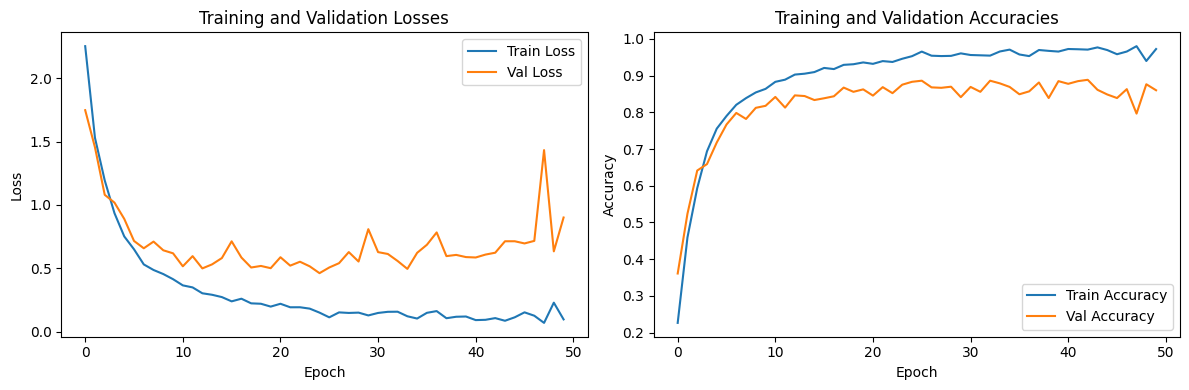

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from tqdm import tqdm
import pandas as pd
from PIL import Image
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Check if GPU is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define data transforms with 64x64 image size
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize to 64x64
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define the directory path
data_dir = r"C:\Users\user\Desktop\plant\boc"

# Load one CSV file
csv_file = 'fold_5_train.csv'

# Define a custom dataset class for CSV loading
class CustomDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        try:
            img_name = os.path.join(self.root_dir, str(self.data.iloc[idx, 0]))  # Access image_path using index 0
            image = Image.open(img_name).convert('RGB')  # Ensure images are in RGB mode
            label = self.data.iloc[idx, 1]  # Access class_label using index 1
        except Exception as e:
            print(f"Error accessing image at index {idx}: {e}")
            return None

        if self.transform:
            image = self.transform(image)

        return image, label

# Load the dataset using CustomDataset
dataset = CustomDataset(csv_file=os.path.join(data_dir, csv_file), root_dir=data_dir, transform=transform)

# Split dataset into train, validation, and test sets
train_size = 0.8
val_size = 0.1
test_size = 1 - train_size - val_size

train_dataset, temp_dataset = train_test_split(dataset, test_size=1 - train_size, random_state=42)
val_dataset, test_dataset = train_test_split(temp_dataset, test_size=test_size / (val_size + test_size), random_state=42)

# Create data loaders for each set
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)



# Print class names (assuming it's available in the dataset)
print("Class Names:", pd.Series([data[1] for data in train_dataset]).unique())

# Define the model architecture
class AlexNet(nn.Module):
    def __init__(self, num_classes=15):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Instantiate the model
model = AlexNet(num_classes=15).to(device)

# Function to evaluate the model
def evaluate_model(model, data_loader, criterion, device):
    model.eval()
    loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avg_loss = loss / len(data_loader)
    accuracy = correct / total
    return avg_loss, accuracy

# Function to train the model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        # Use tqdm for progress display
        progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')
        
        for images, labels in progress_bar:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
            
            progress_bar.set_postfix({'Loss': running_loss / (total_train / batch_size), 'Accuracy': correct_train / total_train})
        
        avg_train_loss = running_loss / len(train_loader)
        train_accuracy = correct_train / total_train
        
        val_loss, val_accuracy = evaluate_model(model, val_loader, criterion, device)
        
        train_losses.append(avg_train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')
    
    return train_losses, val_losses, train_accuracies, val_accuracies

# Set hyperparameters
num_epochs = 50
learning_rate = 1e-3

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device)

# Evaluate on test set
test_loss, test_accuracy = evaluate_model(model, test_loader, criterion, device)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Plotting training and validation curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()

plt.tight_layout()
plt.show()
